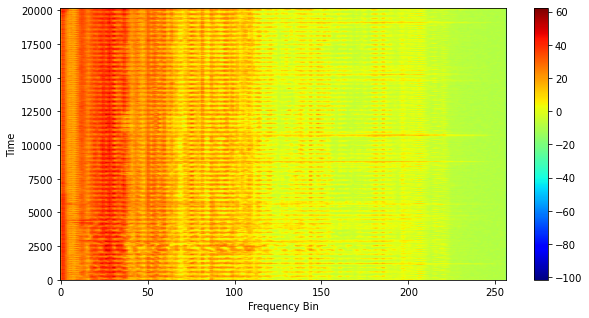

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.signal import welch

# Load the data
sampling_rate, data = wavfile.read('slime-hypercube-Feb-24-2023-1018.wav')

# Compute the power spectral density
nperseg = 512
noverlap = nperseg // 2
freq, psd = welch(data[:, 0], fs=sampling_rate, window='hann', nperseg=nperseg, noverlap=noverlap, scaling='density')
psd = 10 * np.log10(psd * sampling_rate / 2.0)  # Convert to dB/Hz

# Reshape the PSD array to a 2D array
nframes = int(np.ceil(float(len(data)) / nperseg))
psd_2d = np.zeros((nframes, len(freq)))
for i in range(nframes):
    start = i * (nperseg - noverlap)
    end = start + nperseg
    psd_2d[i, :] = 10 * np.log10(welch(data[start:end, 0], fs=sampling_rate, window='hann', nperseg=nperseg, noverlap=noverlap, scaling='density')[1] * sampling_rate / 2.0)

# Plot the PSD as a heatmap
plt.figure(figsize=(10, 5))
plt.imshow(psd_2d, origin='lower', cmap='jet', aspect='auto')
plt.xlabel('Frequency Bin')
plt.ylabel('Time')
plt.colorbar()
plt.show()


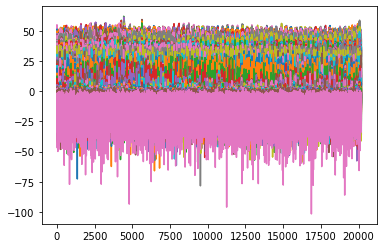

In [83]:
plt.plot(psd_2d)

In [84]:
psd_2d_transposed = psd_2d.T

 ...]

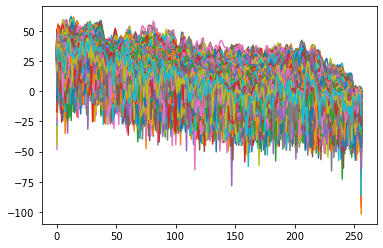

In [85]:
plt.plot(psd_2d_transposed)